# Tensorflow - Multi-Layer Perceptron on MNIST dataset

* Project Scope: To predict what number is written down based solely on the image data in the form of an array
* Data source: MNIST data set of [handwritten digits](http://yann.lecun.com/exdb/mnist/). The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems 

## Import libraries & Load data

In [64]:
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf

# For display in notebook
%matplotlib inline

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("yann.lecun.com/exdb/mnist/",
                                    one_hot=True)

Extracting yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Extracting yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Extracting yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Extracting yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


## Lets  analyze and visualize data 

In [65]:
for i in dataset:
    print (i.num_examples)

55000
5000
10000


we can see we have 55000 images for training, 5000 for validation, 10000 for testing of our model

In [66]:
type(dataset)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [67]:
type(dataset.train.images)

numpy.ndarray

In [68]:
dataset.train.images.shape

(55000, 784)

This lets us know that there are 55000 images and each one is 784 pixels

In [69]:
# Lets check particular image
dataset.train.images[5].shape

(784,)

In [70]:
number = dataset.train.images[5].reshape(28,28)

In [71]:
number

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

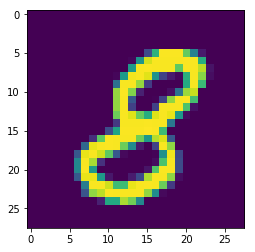

In [72]:
plt.imshow(number)
plt.show()

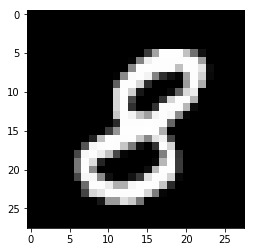

In [73]:
plt.imshow(number,cmap='gist_gray')
plt.show()

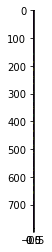

In [74]:
plt.imshow(dataset.train.images[5].reshape(784,1))

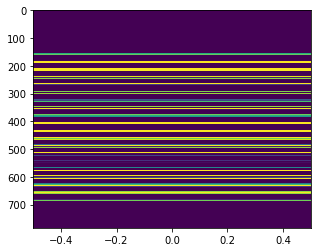

In [75]:
plt.imshow(dataset.train.images[5].reshape(784,1),aspect=0.001)

## Create the Multi-Layer Perceptron Model

    Identifying Factors
    * Number of hidden layers: for this model we will use 2 hidden layers
    * n_samples: mnist.train.num_examples
    * n_input = 784 # number of inputs
    * n_outputs= 10 # will have total 10 output classes (0-9 digits)
    * n_hidden1 = 256 # first hidden layer features
    * n_hidden2 = 256 # second hidden layer features
    * Weights: Because we got 2 hidden layers, we need to define 3 sets of weights 
    * Bias: Because we got 2 hidden layers, we need to define 3 sets of bias
    * learning_rate: 0.01 # How quickly to adjust the cost function
    * training_epochs = 15 # How many training cycles to go through
    * batch_size = 100 # Size of the 'batches' of training data
    
    Steps to create Model
    * Step1: First, we will receive input data array and send it to first hidden layer
    * Step2: Each node of fist hidden layer will calculating activation using inputs,weights,bias
    * Step3: Will continue on to the next hidden layer, and so on until the final output layer
    * Step4: Once data reached Output layer, we will evaluate it using cost/loss function
    * Step5: We will apply an Adam optimization function adjusting weight values to minimize the cost
    * We can use learning rate to adjust how quickly to apply optimization. The lower the rate the higher the possibility for accurate training results, but that comes at the cost of having to wait

** Neural Network Parameters **

In [76]:
n_samples = dataset.train.num_examples
n_input = 784 
n_outputs = 10
n_hidden_1 = 256
n_hidden_2 = 256
weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
           'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
           'out': tf.Variable(tf.random_normal([n_hidden_2, n_outputs]))
          }
biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),
          'b2': tf.Variable(tf.random_normal([n_hidden_2])),
          'out': tf.Variable(tf.random_normal([n_outputs]))
         }
learning_rate = 0.001
training_epochs = 25
batch_size = 100

** Inputs **

In [77]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_outputs])

** Function to create activation and output **

In [78]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

** Creating model **

In [79]:
pred = multilayer_perceptron(x, weights, biases)

** Cost and Optimization functions **

In [80]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [81]:
# Initializing the variables
init = tf.global_variables_initializer()

## Running the Session

We have two loops, the outer loop which runs the epochs, and the inner loop which runs the batches for each epoch of training

In [82]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = dataset.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))


C:\Users\HOME\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 1 cost=209.5311
Epoch: 2 cost=44.8940
Epoch: 3 cost=28.4588
Epoch: 4 cost=19.8553
Epoch: 5 cost=14.5109
Epoch: 6 cost=10.9304
Epoch: 7 cost=8.1527
Epoch: 8 cost=6.2046
Epoch: 9 cost=4.5512
Epoch: 10 cost=3.5662
Epoch: 11 cost=2.6851
Epoch: 12 cost=2.0819
Epoch: 13 cost=1.5495
Epoch: 14 cost=1.2307
Epoch: 15 cost=1.1041
Epoch: 16 cost=0.7928
Epoch: 17 cost=0.6393
Epoch: 18 cost=0.6253
Epoch: 19 cost=0.6026
Epoch: 20 cost=0.5014
Epoch: 21 cost=0.4506
Epoch: 22 cost=0.3968
Epoch: 23 cost=0.3941
Epoch: 24 cost=0.3912
Epoch: 25 cost=0.3002
Model has completed 25 Epochs of Training


## Model Evaluations

Tensorflow comes with some built-in functions to help evaluate our model, including tf.equal and tf.cast with tf.reduce_mean.

**tf.equal():** The tf.equal() operator is an elementwise operator. Assuming x and y are the same shape (as they are in your example) tf.equal(x, y) will produce a tensor with the same shape, where each element indicates whether the corresponding elements in x and y are equal. Therefore, sess.run(tf.equal(y, y)) in your program will return the array [True, True, True]

**tf.cast():** To convert the boolean values (False and True) into 0 and 1 

**tf.reduce_mean:** To calculate the mean of tensor elements along various dimensions of the tensor

In [83]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
correct_predictions = tf.cast(correct_predictions, "float")
accuracy = tf.reduce_mean(correct_predictions)
print("Accuracy:", accuracy.eval({x: dataset.test.images, y: dataset.test.labels}))

Accuracy: 0.9557


To conclude our model acheived 95% accuracy in predecting the numbers based on the images from MNIST dataset